In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# import the models for further classification experiments
from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
np.random.seed(1)
tf.random.set_seed(2)
# basic paths
train_dir = "/content/drive/MyDrive/Computer Science/6th semester/Projec Factory/model/dataset_v3/train"
test_dir = "/content/drive/MyDrive/Computer Science/6th semester/Projec Factory/model/dataset_v3/test"
val_dir = "/content/drive/MyDrive/Computer Science/6th semester/Projec Factory/model/dataset_v3/validation"

class_names = os.listdir(train_dir)
num_classes = len(class_names)

def get_dir_filenames(base_dir, name):
    dir = os.path.join(base_dir, name)

    return {"dir": dir, "file_names": os.listdir(dir)}


train = {name: get_dir_filenames(train_dir, name) for name in class_names}
val = {name: get_dir_filenames(val_dir, name) for name in class_names}

In [ ]:
train_len = sum(map(lambda x: len(x['file_names']), train.values()))
val_len = sum(map(lambda x: len(x['file_names']), val.values()))

print(f"Total training images: {train_len}")
print(f"Total validation images: {val_len}")

Total training images: 168
Total validation images: 30


In [ ]:
# init the models
# vgg_model = vgg16.VGG16(weights='imagenet')
# inception_model = inception_v3.InceptionV3(weights='imagenet')
# resnet_model = resnet50.ResNet50(weights='imagenet')
# mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [ ]:
# img_input = layers.Input(shape=(150, 150, 3))

# define a new model with random weights and 10 classes
# new_input = Input(shape=(640, 480, 3))
# model = VGG16(weights=None, input_tensor=new_input, classes=10)

model = mobilenet.MobileNet(include_top=False, input_shape=(300, 300, 3), weights='imagenet')
# add new classifier layers
x = layers.Flatten()(model.layers[-1].output)
x = layers.Dense(1024, activation='relu')(x)
output = layers.Dense(num_classes, activation='softmax')(x)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['acc'])

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
# train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=2,
        class_mode='categorical',
        subset='training')


validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(300, 300),
        batch_size=1,
        class_mode='categorical')

Found 168 images belonging to 12 classes.
Found 30 images belonging to 12 classes.


In [ ]:
# fit model on the augmented dataset
history = model.fit_generator(train_generator, epochs=20, steps_per_epoch=31, validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
31/31 [==============================] - 81s 2s/step - loss: 85.1768 - acc: 0.1452 - val_loss: 224.7380 - val_acc: 0.1667
Epoch 2/20
31/31 [==============================] - 72s 2s/step - loss: 8.8078 - acc: 0.0968 - val_loss: 138.9832 - val_acc: 0.1333
Epoch 3/20
31/31 [==============================] - 72s 2s/step - loss: 2.8274 - acc: 0.1613 - val_loss: 71.0762 - val_acc: 0.1333
Epoch 4/20
31/31 [==============================] - 73s 2s/step - loss: 2.5501 - acc: 0.1774 - val_loss: 25.1802 - val_acc: 0.1667
Epoch 5/20
31/31 [==============================] - 72s 2s/step - loss: 2.4975 - acc: 0.0645 - val_loss: 10.0019 - val_acc: 0.1667
Epoch 6/20
31/31 [==============================] - 71s 2s/step - loss: 2.6483 - acc: 0.1129 - val_loss: 4.1096 - val_acc: 0.1667
Epoch 7/20
31/31 [==============================] - 72s 2s/step - loss: 2.5447 - acc: 0.0645 - val_loss: 2.8272 - val_acc: 0.2000
Epoch 8/20
31/31 [==============================] - 72s 2s/step - loss: 2.3632 - a

Text(0.5, 1.0, 'Training and validation loss')

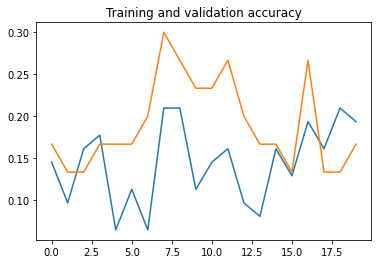

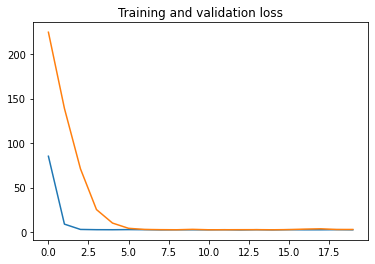

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')